<a href="https://colab.research.google.com/github/hap6v6/ML_study/blob/main/%EC%B6%94%EC%B2%9C%20%EC%8B%9C%EC%8A%A4%ED%85%9C%20%EC%9E%85%EB%AC%B8%ED%8E%B8/6_wrap_up_with_my_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 나와 친구를 위한 영화 추천

In [90]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

In [33]:
my_ratings = pd.read_csv('/content/drive/MyDrive/추천 시스템 입문(inflearn)/data/ml-latest-small/my-ratings-new.csv')
movies = pd.read_csv('/content/drive/MyDrive/추천 시스템 입문(inflearn)/data/ml-latest-small/movies.csv')
genres = pd.read_pickle('/content/drive/MyDrive/추천 시스템 입문(inflearn)/data/ml-latest-small/genres.p')

In [34]:
my_ratings.shape

(149, 4)

In [35]:
# userId당 데이터 개수
my_ratings['userId'].value_counts()

1000    99
1001    50
Name: userId, dtype: int64

In [36]:
# 유저 평점 데이터(my_ratings)에 영화 제목, 장르 정보 붙여주기
# right_index: 장르 데이터는 index에 movieId가 들어가 있음. index를 기준으로 합친다
my_ratings = my_ratings.merge(movies, on="movieId").merge(genres, left_on="movieId", right_index=True)

In [37]:
my_ratings.shape

(149, 26)

In [39]:
my_ratings.sample()

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
42,1000,102903,4.0,2023-04-11 12:00:00,Now You See Me (2013),Crime|Mystery|Thriller,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


# 나의 데이터 EDA
## user 1000

In [41]:
user1000 = my_ratings[my_ratings['userId'] == 1000]

In [42]:
user1000.shape

(99, 26)

<Axes: >

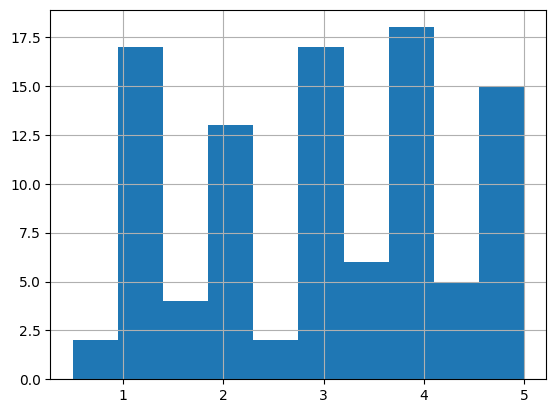

In [50]:
user1000['rating'].hist(bins=10)

In [52]:
# 점수 별로 몇 개의 평점을 주었는지
user1000['rating'].value_counts()

4.0    18
3.0    17
1.0    17
5.0    15
2.0    13
3.5     6
4.5     5
1.5     4
0.5     2
2.5     2
Name: rating, dtype: int64

In [53]:
user1000['rating'].describe()
# 평균적으로 3점을 준다

count    99.000000
mean      2.994949
std       1.406064
min       0.500000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64

In [54]:
# 최고점을 준 영화 찾기
user1000[user1000['rating']==5.0]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
12,1000,141131,5.0,2023-05-10 15:00:00,Guardians (2016),(no genres listed),1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,1000,183897,5.0,2023-05-15 15:00:00,Isle of Dogs (2018),Animation|Comedy,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
30,1000,111364,5.0,2023-04-04 12:00:00,Godzilla (2014),Action|Adventure|Sci-Fi|IMAX,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
39,1000,134393,5.0,2023-04-09 12:00:00,Trainwreck (2015),Comedy|Romance,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
45,1000,158238,5.0,2023-04-13 12:00:00,The Nice Guys (2016),Crime|Mystery|Thriller,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
58,1000,140523,5.0,2023-04-25 12:00:00,"Visit, The (2015)",Comedy|Horror,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
60,1000,180497,5.0,2023-04-27 12:00:00,The Post (2017),Drama|Thriller,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
71,1000,97938,5.0,2023-05-08 12:00:00,Life of Pi (2012),Adventure|Drama|IMAX,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
83,1000,111360,5.0,2023-05-20 12:00:00,Lucy (2014),Action|Sci-Fi,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
88,1000,111659,5.0,2023-05-25 12:00:00,Maleficent (2014),Action|Adventure|Children|IMAX,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
# 최저점 준 영화 찾기
user1000[user1000['rating']==user1000['rating'].min()]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
22,1000,162602,0.5,2023-05-16 15:00:00,The Girl on the Train (2016),Thriller,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
68,1000,88129,0.5,2023-05-05 12:00:00,Drive (2011),Crime|Drama|Film-Noir|Thriller,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [57]:
genre_cols = genres.columns

In [59]:
# 많이 본 장르 찾기
user1000[genre_cols].sum().sort_values(ascending=False)
# Drama 장르의 영화를 가장 많이 봤다.
# Western 장르의 영화는 본 적이 없다

Drama                 41
Comedy                35
Action                31
Adventure             26
Thriller              24
Sci-Fi                17
Romance               14
Crime                 13
Fantasy               10
Horror                 9
IMAX                   7
Mystery                6
Animation              5
War                    3
Musical                3
Documentary            2
Children               2
(no genres listed)     1
Film-Noir              1
Western                0
dtype: int64

# 나와 친구들의 데이터 EDA
## 나와 친구의 취향 차이

In [60]:
# 두 유저가 모두 본 영화
my_ratings['movieId'].value_counts().sort_values(ascending=False)

102903    2
160080    2
106696    2
95441     2
135861    2
         ..
82167     1
82169     1
82202     1
82242     1
82366     1
Name: movieId, Length: 122, dtype: int64

In [68]:
my_ratings[my_ratings['movieId'] == 102903]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
42,1000,102903,4.0,2023-04-11 12:00:00,Now You See Me (2013),Crime|Mystery|Thriller,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
43,1001,102903,2.0,2023-07-19 12:00:00,Now You See Me (2013),Crime|Mystery|Thriller,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


친구들끼리 호불호가 가장 심한 장르를 찾아볼까요?
- 같이 영화를 보려면 이 장르는 반드시 피해라!

In [70]:
# 원본 my_ratings 변경하지 않기 위해서 복사하여 새 테이블 생성
my_ratings_v1 = my_ratings.copy()
my_ratings_v1 = my_ratings_v1.replace(0, np.nan)

In [72]:
my_ratings_v1.sample()

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
41,1001,112556,3.0,2023-07-18 12:00:00,Gone Girl (2014),Drama|Thriller,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [73]:
# user profile 만들기
for col in genre_cols:
  my_ratings_v1[col] = my_ratings_v1[col] * my_ratings_v1['rating']

In [80]:
# 유저 별 특정 장르에 평균적으로 평점 몇 점을 주었는가
user_profile_v1 = my_ratings_v1.groupby('userId')[genre_cols].mean()
user_profile_v1

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,
1000,5.0,3.129032,2.615385,2.8,4.5,2.857143,2.653846,4.25,2.756098,3.05,0.5,3.222222,3.5,3.0,3.166667,3.321429,3.264706,2.791667,3.166667,NaN
1001,NaN,4.038462,3.550000,1.0,3.0,2.888889,3.000000,NaN,3.000000,2.40,NaN,4.100000,2.5,2.5,3.375000,3.062500,4.142857,3.416667,3.000000,3.5


In [83]:
# 친구들끼리 호불호가 가장 심한 장르 찾기 (각 장르 별 평균 평점 차이 가장 큰 것 = 표준편차가 가장 큰 것)
user_profile_describe = user_profile_v1.describe()
user_profile_describe
# count: 본 유저의 수

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1.0,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.00,2.000000,2.000000,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0
mean,5.0,3.583747,3.082692,1.900000,3.75000,2.873016,2.826923,4.25,2.878049,2.725000,0.5,3.661111,3.000000,2.750000,3.270833,3.191964,3.703782,3.104167,3.083333,3.5
std,NaN,0.643064,0.660873,1.272792,1.06066,0.022448,0.244768,NaN,0.172465,0.459619,NaN,0.620683,0.707107,0.353553,0.147314,0.183090,0.620947,0.441942,0.117851,NaN
min,5.0,3.129032,2.615385,1.000000,3.00000,2.857143,2.653846,4.25,2.756098,2.400000,0.5,3.222222,2.500000,2.500000,3.166667,3.062500,3.264706,2.791667,3.000000,3.5
25%,5.0,3.356390,2.849038,1.450000,3.37500,2.865079,2.740385,4.25,2.817073,2.562500,0.5,3.441667,2.750000,2.625000,3.218750,3.127232,3.484244,2.947917,3.041667,3.5
50%,5.0,3.583747,3.082692,1.900000,3.75000,2.873016,2.826923,4.25,2.878049,2.725000,0.5,3.661111,3.000000,2.750000,3.270833,3.191964,3.703782,3.104167,3.083333,3.5
75%,5.0,3.811104,3.316346,2.350000,4.12500,2.880952,2.913462,4.25,2.939024,2.887500,0.5,3.880556,3.250000,2.875000,3.322917,3.256696,3.923319,3.260417,3.125000,3.5
max,5.0,4.038462,3.550000,2.800000,4.50000,2.888889,3.000000,4.25,3.000000,3.050000,0.5,4.100000,3.500000,3.000000,3.375000,3.321429,4.142857,3.416667,3.166667,3.5


In [87]:
# 둘다 본 장르만 보기
user_profile_describe.loc[:, user_profile_describe.loc['count'] == 2]

# 표준 편차가 가장 큰 장르 찾기 = 친구들끼리 호불호가 가장 심한 장르
# Animation, Children, IMAX .. 순

,Action,Adventure,Animation,Children,Comedy,Crime,Drama,Fantasy,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War
count,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,3.583747,3.082692,1.900000,3.75000,2.873016,2.826923,2.878049,2.725000,3.661111,3.000000,2.750000,3.270833,3.191964,3.703782,3.104167,3.083333
std,0.643064,0.660873,1.272792,1.06066,0.022448,0.244768,0.172465,0.459619,0.620683,0.707107,0.353553,0.147314,0.183090,0.620947,0.441942,0.117851
min,3.129032,2.615385,1.000000,3.00000,2.857143,2.653846,2.756098,2.400000,3.222222,2.500000,2.500000,3.166667,3.062500,3.264706,2.791667,3.000000
25%,3.356390,2.849038,1.450000,3.37500,2.865079,2.740385,2.817073,2.562500,3.441667,2.750000,2.625000,3.218750,3.127232,3.484244,2.947917,3.041667
50%,3.583747,3.082692,1.900000,3.75000,2.873016,2.826923,2.878049,2.725000,3.661111,3.000000,2.750000,3.270833,3.191964,3.703782,3.104167,3.083333
75%,3.811104,3.316346,2.350000,4.12500,2.880952,2.913462,2.939024,2.887500,3.880556,3.250000,2.875000,3.322917,3.256696,3.923319,3.260417,3.125000
max,4.038462,3.550000,2.800000,4.50000,2.888889,3.000000,3.000000,3.050000,4.100000,3.500000,3.000000,3.375000,3.321429,4.142857,3.416667,3.166667


In [88]:
# 가장 호불호가 심한 장르인 Animation 살펴보기
animation = my_ratings[my_ratings['Animation'] == 1]

<Axes: xlabel='userId', ylabel='rating'>

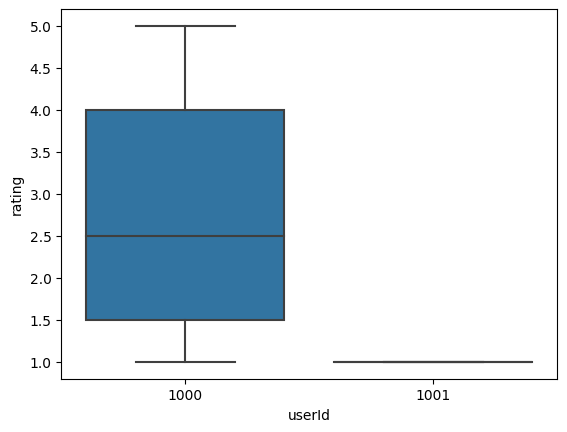

In [91]:
sns.boxplot(data=animation, x='userId', y='rating')
# 박스 안의 긴 줄 = 평균
# 1001번 유저의 Animation 장르 영화 평점 데이터는 1개라서 평균 값을 나타내는 선만 보임
# 1000번 유저의 Animation 장르 영화 평점의 범위는 1.0부터 5.0점까지이다.

[boxplot 참고 자료](https://boxnwhis.kr/2019/02/19/boxplot.html)

# Lasso 하이퍼파라미터 튜닝
## Lasso로 user profile 만들기

In [102]:
model = Lasso()
model
# Lasso의 하이퍼파라티머-> 우리가 찾아줘야 함
# Lasso (Jlpha=1.0, copy x-True, fit intercept=True, max iter=1000, 
# normalize=False, positive=False, precompute=False, random state=None, 
# selection='cyclic', tol=0.0001, warm_start=False)
# 특히 alpha: 정규화 텀을 모델에 얼마나 반영을 하는지를 결정한다.

Lasso()

<하이퍼파라미터 튜닝>
- Manual Search
  - 직관 또는 대중적으로 알려진 노하우 등에 의존하여 하이퍼파라미터 값들을 다양하게 넣어보고, 그 중 좋은 성능을 내는 값을 선택
  - 실제로는 내가 넣어본 하이퍼파라미터 값들이 최선이 아닐 수 있다. 최적점을 못 찾게 되는 문제
- Grid Search
  - 탐색의 대상이 되는 특정 구간 내의 후보 hyperparameter 값들을 일정한 간격을 두고 선정하여, 이들 각각에 대하여 측정한 성능 결과를 기록한 뒤, 가장 높은 성능을 발휘했던 hyperparameter 값을 선정하는 방법
  - Manual Search에 비교하여 좀 더 균등하고 체계적인 탐색 가능
  - 전체 탐색 대상 구간을 어떻게 설정할지, 간격의 길이는 어떻게 설정할지 추가 결정 필요 (간격이 촘촘하면 탐색 시간 오래 걸리고, 넓으면 최적점 놓칠 수 있음)
- Random Search (우리가 해볼 것)
  - Grid Search와 큰 맥락은 유사하나, 탐색 대상 구간 내의 후보 hyperparameter 값들을 랜덤 샘플링(sampling)을 통해 선정한다는 점이 다름
  - 불필요한 반복 수행 횟수를 대폭 줄이면서, 정해진 간격(grid) 사이에 위치한 값들에 대해서도 확률적으로 탐색이 가능하여 빠르게 최적 하이퍼파라미터 값을 찾을 수 있음
- 그 외에도 다른 튜닝 방법이 있음

## 하이퍼 파라미터 튜닝 (Random Search)

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand # 범위 정해주고 그 안에서 랜덤 선택

In [108]:
param_grid = {'alpha': sp_rand()} # 0~ 1.0 사이에서 모든 숫자를 동일한 확률로 하여 랜덤 선택

# RandomizedSearchCV의 옵션
# estimator: 사용할 모델
# param_distributions: 시도해볼 파라미터들
# n_iter: 시도 횟수
# cv(cross validation): 교차검증 (고정된 test 셋에만 잘 설명하는 과적합 방지하기 위해 test set을 중복 없이 바꾸어가면서 진행) 
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=200, cv=20, random_state=42)

In [109]:
rsearch.fit(user1000[genre_cols], user1000['rating'])

RandomizedSearchCV(cv=20, estimator=Lasso(), n_iter=200,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fef90cef8b0>},
                   random_state=42)

RandomizaedSearch 결과

In [110]:
# 200번의 시도 중에서 가장 좋은 모델을 사용할 수 있게끔 설정되어 있음
rsearch.best_estimator_.alpha

0.016587828927856152

In [114]:
intercept = rsearch.best_estimator_.intercept_
coef = rsearch.best_estimator_.coef_

In [116]:
# 가장 좋은 모델의 intercept, coef 값 보기 좋게 테이블로 생성
user1000_profile = pd.DataFrame([intercept, *coef], index=['intercept', *genre_cols], columns=['score'])
user1000_profile

,score
intercept,3.571873
(no genres listed),0.000000
Action,0.000000
Adventure,-0.763865
Animation,-0.000000
Children,0.473868
Comedy,-0.456701
Crime,-0.315166
Documentary,0.014632
Drama,-0.497587


<Axes: xlabel='index', ylabel='score'>

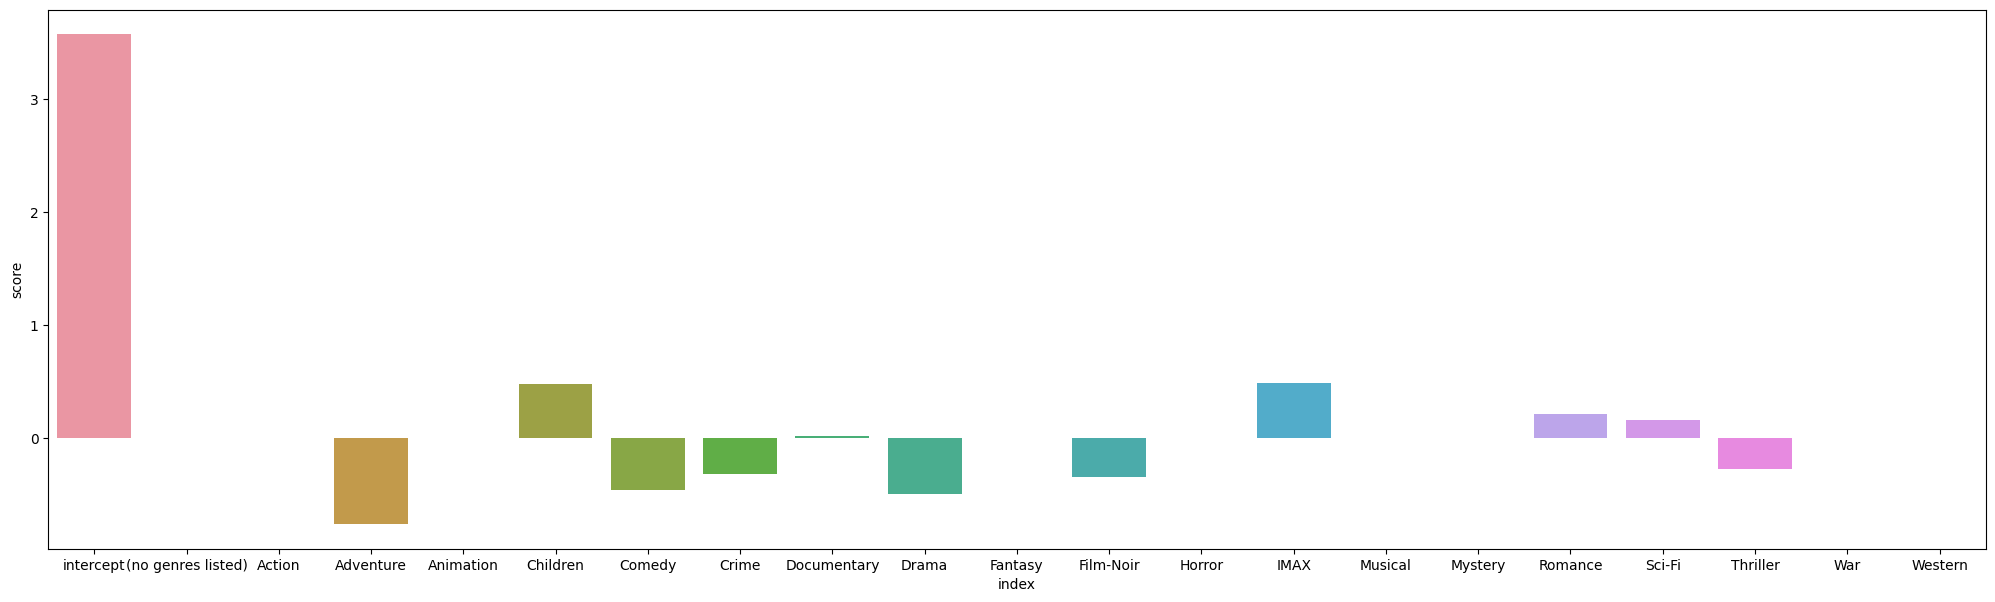

In [117]:
# 시각화
plt.figure(figsize=(25,7))
sns.barplot(data=user1000_profile.reset_index(), x='index', y='score')
# Lasso의 feature selection: 특정 장르(Animation, Fantasy 등)의 feature 중요도가 낮다고 판단하여 계수를 0으로 수렴시킴. 
# 데이터가 없거나 부족해서 feature에 대한 판단을 충분히 할 수 없다고 판단하는 것도 있지만, 예측할 때 다른 요소가 비교적 더 중요한 경우 장르 특성의 중요도가 낮다고 판단 될 수 있음.
# 장르별로 계수가 나왔다 = 장르에 대한 선호도가 분명하다. coef가 1이나 -1에 가깝다 = 정말 좋아하거나 싫어한다

In [118]:
# sklearn 패키지에서 predict 함수 지원
predictions = rsearch.best_estimator_.predict(genres)
predictions

array([2.82517486, 3.28187576, 3.33081434, ..., 3.07428546, 3.57187277,
       3.11517188])

In [119]:
genres['user1000'] = predictions

In [122]:
genres.sample()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user1000
movieId,,,,,,,,,,,,,,,,,,,,,
1398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,3.787515


In [125]:
# user1000이 보지 않은 영화에 대한 예측 값을 확인하기 위해
# user1000에 없는 영화(movieId)의 장르 데이터만 추려서 보기. ~isin = is not in
# 내림차순 정렬: 예측 평점 높은 순으로 정렬
rating_predictions = genres[~genres.index.isin(user1000['movieId'])].sort_values('user1000', ascending=False)
rating_predictions.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user1000
movieId,,,,,,,,,,,,,,,,,,,,,
595,0,0,0,1,1,0,0,0,0,1,...,0,1,1,0,1,0,0,0,0,4.748294
59037,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,4.693785
3159,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,4.532652
71264,0,0,0,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,4.532652
81847,0,0,0,1,1,1,0,0,0,1,...,0,1,1,0,1,0,0,0,0,4.291593


In [126]:
# 위의 1000번 유저가 좋아할 영화 확인해보기 (Id랑 title만 붙여주기)
rating_predictions = rating_predictions.merge(movies[['movieId', 'title']], left_index=True, right_on='movieId')
rating_predictions
# Beauty and the Beast, Speed Race, Fantasia 2000 등이 예측 평점이 높다 (Children, IMAX 장르의 계수가 높게 나왔기 때문에)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user1000,movieId,title
512,0,0,0,1,1,0,0,0,0,1,...,1,0,1,0,0,0,0,4.748294,595,Beauty and the Beast (1991)
6731,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,4.693785,59037,Speed Racer (2008)
2381,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,4.532652,3159,Fantasia 2000 (1999)
7133,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,4.532652,71264,Cloudy with a Chance of Meatballs (2009)
7467,0,0,0,1,1,1,0,0,0,1,...,1,0,1,0,0,0,0,4.291593,81847,Tangled (2010)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1.579857,55116,"Hunting Party, The (2007)"
4681,0,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,1.538554,6990,The Great Train Robbery (1978)
4005,0,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,1.538554,5657,Flashback (1990)
5808,0,0,1,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,1.264691,31921,"Seven-Per-Cent Solution, The (1976)"


In [130]:
# 특정 장르 정해서 추천 받기 (Comedy 장르인데 Animation 장르는 제외하고)
rating_predictions[(rating_predictions['Comedy'] == 1) & (rating_predictions['Animation'] == 0)].head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user1000,movieId,title
1237,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,3.965815,1646,RocketMan (a.k.a. Rocket Man) (1997)
771,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,3.804682,1013,"Parent Trap, The (1961)"
769,0,0,0,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,3.804682,1011,Herbie Rides Again (1974)
4072,0,0,0,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,3.804682,5804,"Santa Clause 2, The (2002)"
8700,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,3.804682,122932,Elsa & Fred (2014)


In [132]:
# 평소에 보고 싶었던 영화의 예상평점 찾기
rating_predictions.loc[rating_predictions['title'].str.contains('Harry Potter'), ['user1000', 'title']]

,user1000,title
7078,3.510562,Harry Potter and the Half-Blood Prince (2009)
7465,3.294919,Harry Potter and the Deathly Hallows: Part 1 (...
5166,3.294919,Harry Potter and the Prisoner of Azkaban (2004)
3574,3.281876,Harry Potter and the Sorcerer's Stone (a.k.a. ...
6062,3.021056,Harry Potter and the Goblet of Fire (2005)
4076,2.808008,Harry Potter and the Chamber of Secrets (2002)
7644,2.797332,Harry Potter and the Deathly Hallows: Part 2 (...
6522,2.797332,Harry Potter and the Order of the Phoenix (2007)
